## CED19I028 - Sumit Kumar
### ASBD Mid-Sem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sns


In [2]:
df = pd.read_csv("brasil.csv")
df

,ID,Data,Ano,Rodada,Equipe_mandante,Equipe_visitante,Gols_mandante,Gols_visitante,Mandante_UF,Visitante_UF,Vencedor,Arena,OBS
0,2003.01.0001,29/03/2003,2003,1,Guarani,Vasco,4,2,SP,RJ,Mandante,Brinco de Ouro,NaN
1,2003.01.0002,29/03/2003,2003,1,Athletico-PR,Grêmio,2,0,PR,RS,Mandante,Arena da Baixada,NaN
2,2003.01.0003,30/03/2003,2003,1,Flamengo,Coritiba,1,1,RJ,PR,Empate,Maracanã,NaN
3,2003.01.0004,30/03/2003,2003,1,Goiás,Paysandu,2,2,GO,PA,Empate,Serra Dourada,NaN
4,2003.01.0005,30/03/2003,2003,1,Internacional,Ponte Preta,1,1,RS,SP,Empate,Beira-Rio,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6881,2019.38.0376,08/12/2019,2019,38,Vasco,Chapecoense,1,1,RJ,SC,Empate,Maracanã,NaN
6882,2019.38.0377,08/12/2019,2019,38,Botafogo-RJ,Ceará,1,1,RJ,CE,Empate,Engenhão,NaN
6883,2019.38.0378,08/12/2019,2019,38,Avaí,Athletico-PR,0,0,SC,PR,Empate,Ressacada,NaN
6884,2019.38.0379,08/12/2019,2019,38,Goiás,Grêmio,3,2,GO,RS,Mandante,Serra Dourada,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6886 entries, 0 to 6885
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                6886 non-null   object
 1   Data              6886 non-null   object
 2   Ano               6886 non-null   int64 
 3   Rodada            6886 non-null   int64 
 4   Equipe_mandante   6886 non-null   object
 5   Equipe_visitante  6886 non-null   object
 6   Gols_mandante     6886 non-null   int64 
 7   Gols_visitante    6886 non-null   int64 
 8   Mandante_UF       6886 non-null   object
 9   Visitante_UF      6886 non-null   object
 10  Vencedor          6886 non-null   object
 11  Arena             6886 non-null   object
 12  OBS               11 non-null     object
dtypes: int64(4), object(9)
memory usage: 699.5+ KB


### 1. Rename column names and data to English

In [4]:
new_columns = {
    'Data': 'Match Date',
    'Ano': 'Season (Year)',
    'Rodada': 'Season round',
    'Equipe_mandante': 'Home team',
    'Equipe_visitante': 'Visitor team',
    'Gols_mandante': 'Home team Goals',
    'Gols_visitante': 'Visitor team Goals',
    'Mandante_UF': 'Home team Brazil\'s state',
    'Visitante_UF': 'Visitor team Brazil\'s state',
    'Vencedor': 'Winner',
    'OBS': 'Comments'
}

df.rename(columns = new_columns, inplace=True)
df

,ID,Match Date,Season (Year),Season round,Home team,Visitor team,Home team Goals,Visitor team Goals,Home team Brazil's state,Visitor team Brazil's state,Winner,Arena,Comments
0,2003.01.0001,29/03/2003,2003,1,Guarani,Vasco,4,2,SP,RJ,Mandante,Brinco de Ouro,NaN
1,2003.01.0002,29/03/2003,2003,1,Athletico-PR,Grêmio,2,0,PR,RS,Mandante,Arena da Baixada,NaN
2,2003.01.0003,30/03/2003,2003,1,Flamengo,Coritiba,1,1,RJ,PR,Empate,Maracanã,NaN
3,2003.01.0004,30/03/2003,2003,1,Goiás,Paysandu,2,2,GO,PA,Empate,Serra Dourada,NaN
4,2003.01.0005,30/03/2003,2003,1,Internacional,Ponte Preta,1,1,RS,SP,Empate,Beira-Rio,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6881,2019.38.0376,08/12/2019,2019,38,Vasco,Chapecoense,1,1,RJ,SC,Empate,Maracanã,NaN
6882,2019.38.0377,08/12/2019,2019,38,Botafogo-RJ,Ceará,1,1,RJ,CE,Empate,Engenhão,NaN
6883,2019.38.0378,08/12/2019,2019,38,Avaí,Athletico-PR,0,0,SC,PR,Empate,Ressacada,NaN
6884,2019.38.0379,08/12/2019,2019,38,Goiás,Grêmio,3,2,GO,RS,Mandante,Serra Dourada,NaN


### Change winners columns data into english..

In [5]:
df['Winner'].value_counts()

Mandante     3488
Empate       1795
Visitante    1603
Name: Winner, dtype: int64

In [6]:
d = {
    'Mandante': 'home',
    'Empate': 'tie',
    'Visitante': 'visiting'
}

for each in d.keys():
    df.loc[df['Winner'] == each, 'Winner'] = d[each]

df

,ID,Match Date,Season (Year),Season round,Home team,Visitor team,Home team Goals,Visitor team Goals,Home team Brazil's state,Visitor team Brazil's state,Winner,Arena,Comments
0,2003.01.0001,29/03/2003,2003,1,Guarani,Vasco,4,2,SP,RJ,home,Brinco de Ouro,NaN
1,2003.01.0002,29/03/2003,2003,1,Athletico-PR,Grêmio,2,0,PR,RS,home,Arena da Baixada,NaN
2,2003.01.0003,30/03/2003,2003,1,Flamengo,Coritiba,1,1,RJ,PR,tie,Maracanã,NaN
3,2003.01.0004,30/03/2003,2003,1,Goiás,Paysandu,2,2,GO,PA,tie,Serra Dourada,NaN
4,2003.01.0005,30/03/2003,2003,1,Internacional,Ponte Preta,1,1,RS,SP,tie,Beira-Rio,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6881,2019.38.0376,08/12/2019,2019,38,Vasco,Chapecoense,1,1,RJ,SC,tie,Maracanã,NaN
6882,2019.38.0377,08/12/2019,2019,38,Botafogo-RJ,Ceará,1,1,RJ,CE,tie,Engenhão,NaN
6883,2019.38.0378,08/12/2019,2019,38,Avaí,Athletico-PR,0,0,SC,PR,tie,Ressacada,NaN
6884,2019.38.0379,08/12/2019,2019,38,Goiás,Grêmio,3,2,GO,RS,home,Serra Dourada,NaN


### 2. Dropping Comments column, because it has dominant NaN value

In [7]:
df.drop(['Comments'], axis=1, inplace=True)
df

,ID,Match Date,Season (Year),Season round,Home team,Visitor team,Home team Goals,Visitor team Goals,Home team Brazil's state,Visitor team Brazil's state,Winner,Arena
0,2003.01.0001,29/03/2003,2003,1,Guarani,Vasco,4,2,SP,RJ,home,Brinco de Ouro
1,2003.01.0002,29/03/2003,2003,1,Athletico-PR,Grêmio,2,0,PR,RS,home,Arena da Baixada
2,2003.01.0003,30/03/2003,2003,1,Flamengo,Coritiba,1,1,RJ,PR,tie,Maracanã
3,2003.01.0004,30/03/2003,2003,1,Goiás,Paysandu,2,2,GO,PA,tie,Serra Dourada
4,2003.01.0005,30/03/2003,2003,1,Internacional,Ponte Preta,1,1,RS,SP,tie,Beira-Rio
...,...,...,...,...,...,...,...,...,...,...,...,...
6881,2019.38.0376,08/12/2019,2019,38,Vasco,Chapecoense,1,1,RJ,SC,tie,Maracanã
6882,2019.38.0377,08/12/2019,2019,38,Botafogo-RJ,Ceará,1,1,RJ,CE,tie,Engenhão
6883,2019.38.0378,08/12/2019,2019,38,Avaí,Athletico-PR,0,0,SC,PR,tie,Ressacada
6884,2019.38.0379,08/12/2019,2019,38,Goiás,Grêmio,3,2,GO,RS,home,Serra Dourada


### 3. Find duplicates and drop if exist.. 

In [8]:
df[df.duplicated()]

,ID,Match Date,Season (Year),Season round,Home team,Visitor team,Home team Goals,Visitor team Goals,Home team Brazil's state,Visitor team Brazil's state,Winner,Arena


### 4. Find total number of matches in each year..

In [9]:
df['ID'][df.duplicated()]

Series([], Name: ID, dtype: object)

In [10]:
bar_data = df.groupby(['Season (Year)']).count()['ID']
bar_data

Season (Year)
2003    552
2004    552
2005    462
2006    380
2007    380
2008    380
2009    380
2010    380
2011    380
2012    380
2013    380
2014    380
2015    380
2016    380
2017    380
2018    380
2019    380
Name: ID, dtype: int64

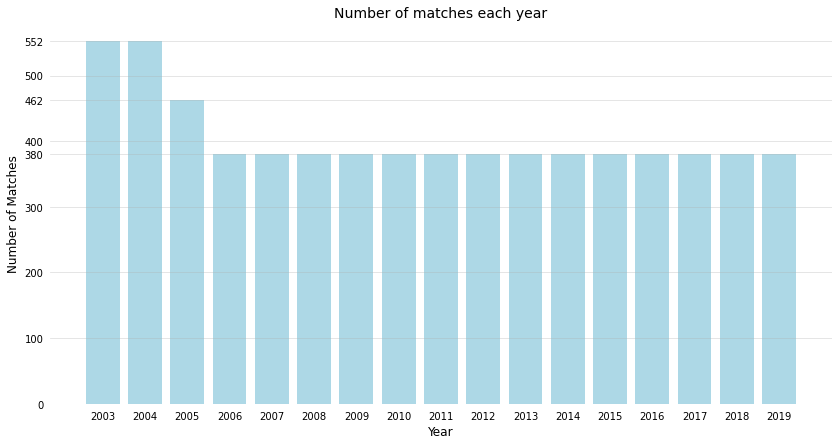

In [11]:
def plotBar(x_axis, y_axis, title):
    plt.bar(x_axis, y_axis, color='lightblue')
    plt.xlabel("Year", size=12)
    plt.ylabel("Number of Matches", size=12)
    
    yticks = [0, 100, 200, 300, 380, 400, 462, 500, 552]
    plt.yticks(yticks)

    plt.grid(axis ='y',alpha=0.4)
    plt.tick_params(left = False, bottom=False)

    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.title(title, size=14)
    

plt.figure(figsize=(14,7))

x = [str(each) for each in bar_data.index.tolist()]
y = bar_data.values.tolist()
plotBar(x, y, "Number of matches each year")

### 5. Number of teams in each state.

In [12]:
teams_in_state = {}
states = df['Home team Brazil\'s state'].unique().tolist()
for each in states:
    teams_in_state[each] = teams_in_state.get(each, df[df['Home team Brazil\'s state'] == each]['Home team'].unique().tolist())


teams_in_state


{'SP': ['Guarani',
  'Santos',
  'Corinthians',
  'Ponte Preta',
  'São Caetano',
  'São Paulo',
  'Palmeiras',
  'Portuguesa',
  'Santo André',
  'Barueri',
  'Grêmio Prudente'],
 'PR': ['Athletico-PR', 'Coritiba', 'Paraná'],
 'RJ': ['Flamengo', 'Fluminense', 'Vasco', 'Botafogo-RJ'],
 'GO': ['Goiás', 'Atlético-GO'],
 'RS': ['Internacional', 'Juventude', 'Grêmio'],
 'SC': ['Criciúma', 'Figueirense', 'Avaí', 'Chapecoense', 'Joinville'],
 'CE': ['Fortaleza', 'Ceará'],
 'MG': ['Cruzeiro', 'Atlético-MG', 'Ipatinga', 'América-MG'],
 'ES': ['Vitória'],
 'BH': ['Bahia'],
 'PA': ['Paysandu'],
 'DF': ['Brasiliense'],
 'PE': ['Santa Cruz', 'Sport', 'Náutico'],
 'RN': ['América-RN'],
 'BA': ['Vitória', 'Bahia'],
 'AL': ['CSA']}

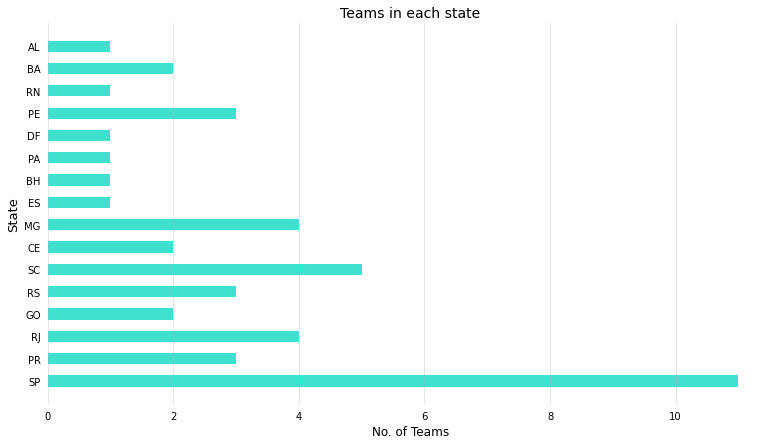

In [13]:
def plotBarH(x_axis, y_axis, title):
    plt.barh(x_axis, y_axis, color='turquoise', align='center', height=0.5)
    plt.xlabel("No. of Teams", size=12)
    plt.ylabel("State", size=13)

    plt.grid(axis ='x',alpha=0.4)
    plt.tick_params(left = False, bottom=False)

    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.title(title, size=14)
    

x = list(teams_in_state.keys())
y = [len(each) for each in teams_in_state.values()]

plt.figure(figsize=(13,7))
plotBarH(x, y, 'Teams in each state')


### 6. Home team's goal and visiting teams Goals Comparision..

In [14]:
df['Home team Goals'].value_counts()

1    2324
2    1759
0    1371
3     912
4     362
5     116
6      36
7       6
Name: Home team Goals, dtype: int64

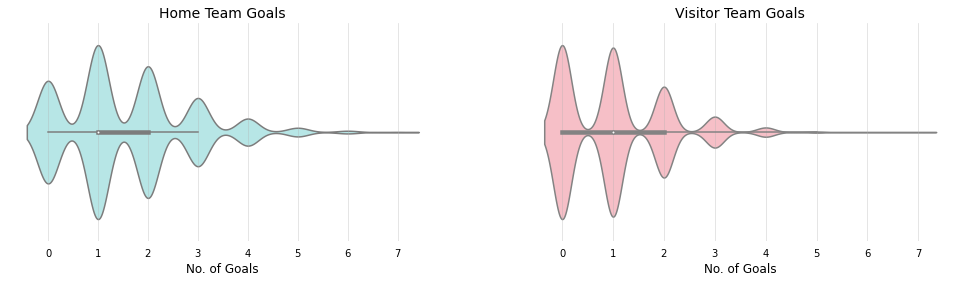

In [15]:

def plotViolinGraph(data, name, color):
    sns.violinplot(x = data, scale="count", gridsize=1000, color=color)

    plt.grid(axis ='x',alpha=0.4)
    plt.tick_params(left = False, bottom=False)
    plt.xlabel("No. of Goals", size=12)

    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.title(name, size=14)
    


plt.figure(figsize=(17,4))
plt.subplot(1, 2, 1)
plotViolinGraph(df['Home team Goals'].tolist(), "Home Team Goals", "paleturquoise");

plt.subplot(1, 2, 2)
plotViolinGraph(df['Visitor team Goals'].tolist(), "Visitor Team Goals", "lightpink");




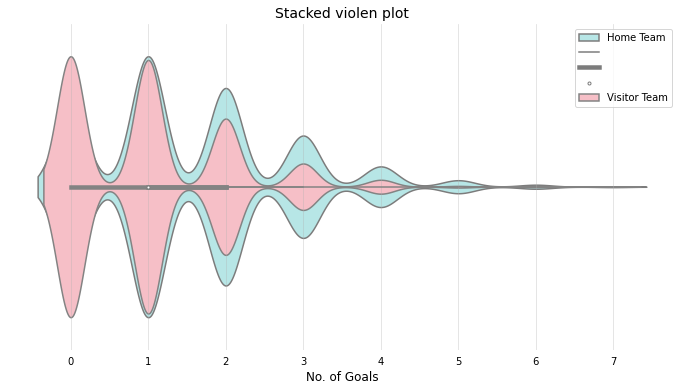

In [16]:
plt.figure(figsize=(12,6))

sns.violinplot(x = df['Home team Goals'].tolist(), scale="count", gridsize=1000, color='paleturquoise')
sns.violinplot(x = df['Visitor team Goals'].tolist(), scale="count", gridsize=1000, color='lightpink')

plt.legend(labels=['Home Team', '', '', '', 'Visitor Team'])

plt.grid(axis ='x',alpha=0.4)
plt.tick_params(left = False, bottom=False)
plt.xlabel("No. of Goals", size=12)

for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.title("Stacked violen plot", size=14)

plt.show()

### 7. Percentage of Winning Ratio of matches

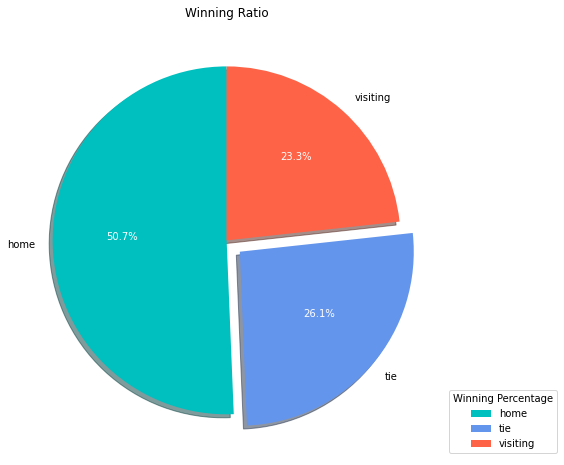

In [17]:
def func(pct):
    return "{:.1f}%\n".format(pct)

def plotPeiChart(title, data, names):
    explodes = (0, 0.1, 0)
    colors = ("c", "cornflowerblue", "tomato")

    _, _, autotexts = plt.pie(data, 
            labels = names,
            explode = explodes,
            shadow = True,
            colors = colors,
            startangle = 90,
            autopct=lambda pct: func(pct)
           )

    for autotext in autotexts:
        autotext.set_color('white')
        
    plt.legend(names,
             title="Winning Percentage",
             loc="lower left",
             bbox_to_anchor=(1,0,0.5,1))

    plt.title(title)
    

plt.figure(figsize=(15,8))

plotPeiChart('Winning Ratio', df['Winner'].value_counts().tolist(), df['Winner'].value_counts().index.tolist())

### 8. Arena which has most number of home and visitor winners.

In [18]:
arena_count = {}
arena_count_lose = {}
arena = df['Arena'].unique().tolist()
for each in arena:
    try:
        count_wins = df[df['Arena'] == each]['Winner'].value_counts().loc['home']
        count_lose = df[df['Arena'] == each]['Winner'].value_counts().loc['visiting']
        
        total_rows = df[df['Arena'] == each]['Winner'].shape[0]
        if(count_wins > 10):
            arena_count[each] = arena_count.get(each, (count_wins/total_rows)*100 )
            
        if(count_lose > 10):
            arena_count_lose[each] = arena_count_lose.get(each, (count_lose/total_rows)*100 )
    
    except:
        pass


most_home_winners = sorted(arena_count.items(), key=lambda kv:(kv[1], kv[0]))[-20:]
most_visitor_winners = sorted(arena_count_lose.items(), key=lambda kv:(kv[1], kv[0]))[-20:]

most_visitor_winners

[('Raulino de Oliveira', 24.731182795698924),
 ('Mangueirão', 25.757575757575758),
 ('Fonte Nova', 26.31578947368421),
 ('Castelão', 26.666666666666668),
 ('Pituaçu', 27.659574468085108),
 ('Serra Dourada', 27.986348122866893),
 ('Barradão', 28.26086956521739),
 ('Anacleto Campanella', 28.40909090909091),
 ('Aflitos', 29.333333333333332),
 ('Arena Condá', 29.82456140350877),
 ('Heriberto Hulse', 30.120481927710845),
 ('Presidente Vargas', 30.76923076923077),
 ('Ressacada', 31.30434782608696),
 ('Moisés Lucarelli', 31.843575418994412),
 ('Arena Pernambuco', 38.88888888888889),
 ('Mané Garrincha', 40.0),
 ('Ipatingão', 41.17647058823529),
 ('Prudentão', 42.30769230769231),
 ('Arruda', 47.368421052631575),
 ('Machadão', 73.68421052631578)]

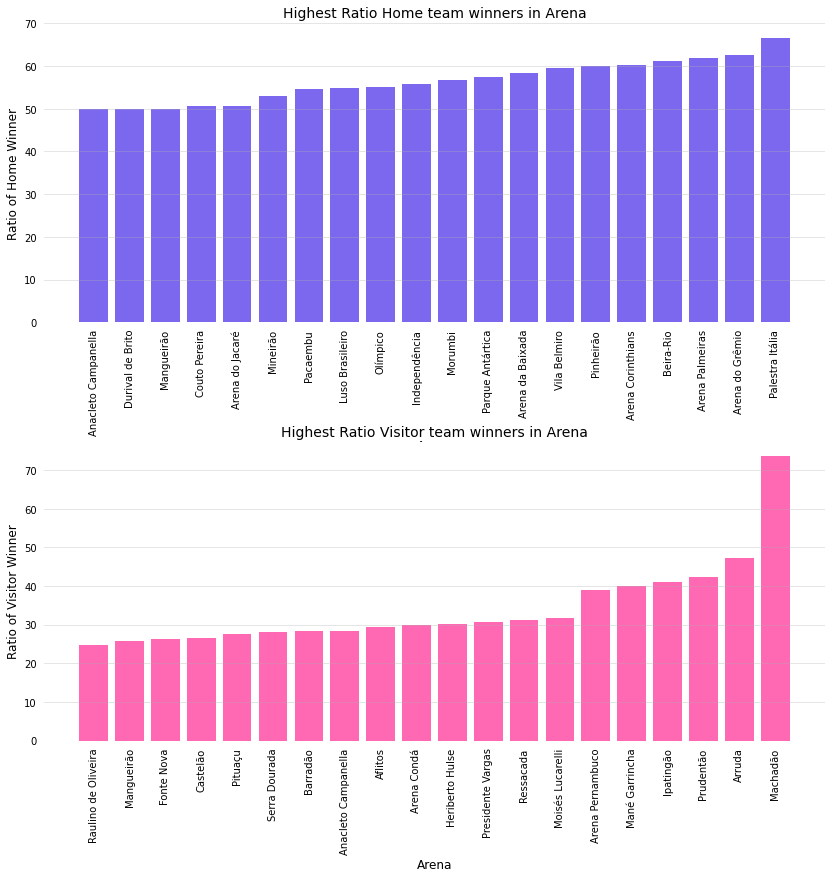

In [19]:
def plotBar(x_axis, y_axis, title, winner, color):
    plt.bar(x_axis, y_axis, color=color)
    plt.xlabel("Arena", size=12)
    plt.ylabel(f"Ratio of {winner} Winner", size=12)
    plt.xticks(rotation=90)
    

    plt.grid(axis ='y',alpha=0.4)
    plt.tick_params(left = False, bottom=False)

    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.title(title, size=14)
    

plt.figure(figsize=(14,12))

plt.subplot(2,1,1)
x = [each[0] for each in most_home_winners]
y = [each[1] for each in most_home_winners]
plotBar(x, y, "Highest Ratio Home team winners in Arena", "Home", "mediumslateblue")

plt.subplot(2,1,2)
x = [each[0] for each in most_visitor_winners]
y = [each[1] for each in most_visitor_winners]
plotBar(x, y, "Highest Ratio Visitor team winners in Arena", "Visitor", "hotpink")

plt.subplots_adjust(bottom=0.07,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

### 9. Correlation between home team score VS visitor team score

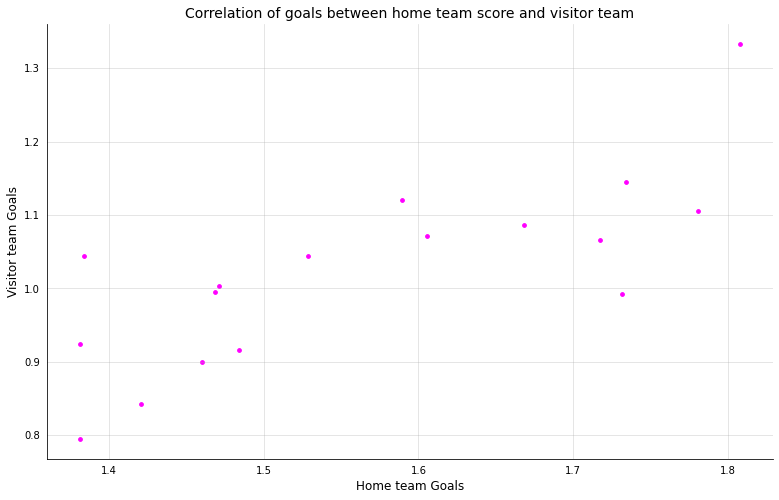

In [20]:
x = df.groupby('Season (Year)').mean()['Home team Goals']
y = df.groupby('Season (Year)').mean()['Visitor team Goals']


plt.figure(figsize=(13,8))
plt.scatter(x, y, color='magenta', s=14)

plt.ylabel("Visitor team Goals", size=12)
plt.xlabel("Home team Goals", size=12)

plt.grid(alpha=0.4)
plt.tick_params(left = False, bottom=False)

count = 1;
for spine in plt.gca().spines.values():
    if(count&1):
        pass;
    else:
        spine.set_visible(False)
    count += 1
    
plt.title("Correlation of goals between home team score and visitor team", size=14)   
plt.show()

### 10. Comparison between highest goal and lowest goal scored overall.

In [21]:

df['Total Goals'] = df['Home team Goals'] + df['Visitor team Goals']
df

,ID,Match Date,Season (Year),Season round,Home team,Visitor team,Home team Goals,Visitor team Goals,Home team Brazil's state,Visitor team Brazil's state,Winner,Arena,Total Goals
0,2003.01.0001,29/03/2003,2003,1,Guarani,Vasco,4,2,SP,RJ,home,Brinco de Ouro,6
1,2003.01.0002,29/03/2003,2003,1,Athletico-PR,Grêmio,2,0,PR,RS,home,Arena da Baixada,2
2,2003.01.0003,30/03/2003,2003,1,Flamengo,Coritiba,1,1,RJ,PR,tie,Maracanã,2
3,2003.01.0004,30/03/2003,2003,1,Goiás,Paysandu,2,2,GO,PA,tie,Serra Dourada,4
4,2003.01.0005,30/03/2003,2003,1,Internacional,Ponte Preta,1,1,RS,SP,tie,Beira-Rio,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6881,2019.38.0376,08/12/2019,2019,38,Vasco,Chapecoense,1,1,RJ,SC,tie,Maracanã,2
6882,2019.38.0377,08/12/2019,2019,38,Botafogo-RJ,Ceará,1,1,RJ,CE,tie,Engenhão,2
6883,2019.38.0378,08/12/2019,2019,38,Avaí,Athletico-PR,0,0,SC,PR,tie,Ressacada,0
6884,2019.38.0379,08/12/2019,2019,38,Goiás,Grêmio,3,2,GO,RS,home,Serra Dourada,5


In [22]:
df.groupby('Season (Year)').sum()
# 2018 min
# 2003 max

,Season round,Home team Goals,Visitor team Goals,Total Goals
Season (Year),,,,
2003,12973,983,610,1593
2004,12972,948,588,1536
2005,9933,835,616,1451
2006,7410,604,426,1030
2007,7410,634,413,1047
2008,7410,658,377,1035
2009,7410,659,435,1094
2010,7410,581,397,978
2011,7410,610,407,1017


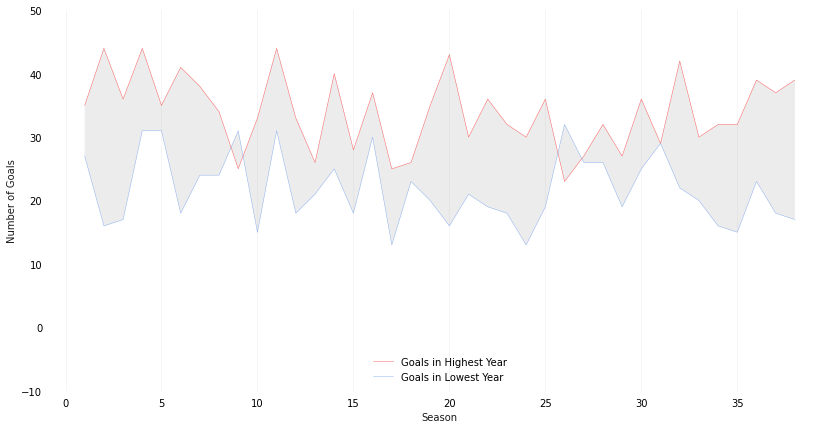

In [23]:
#plotting
plt.figure(figsize=(14,7))
x1 = df[df['Season (Year)'] == 2003].groupby('Season round').sum().index.tolist()[:38]
y1 = df[df['Season (Year)'] == 2003].groupby('Season round').sum()['Total Goals'].tolist()[:38]
plt.plot(x1, y1, c='red', alpha=0.6 , linewidth=0.5, label='Goals in Highest Year')

x2 = df[df['Season (Year)'] == 2018].groupby('Season round').sum().index.tolist()
y2 = df[df['Season (Year)'] == 2018].groupby('Season round').sum()['Total Goals'].tolist()
plt.plot(x2, y2, c='cornflowerblue', alpha=0.7 , linewidth=0.5,label='Goals in Lowest Year')

plt.legend(loc=8, frameon=False)

# changing x-axis' names
plt.ylim([-10,50])
plt.grid(axis='x',alpha=0.15)
plt.xlabel('Season' , alpha=0.9)
plt.ylabel('Number of Goals' , alpha=0.9)

# dejunckifying  
plt.tick_params(left = False, bottom=False)
plt.fill_between(x1, y1, y2,
                 facecolor = 'gray', alpha = 0.15)

for spine in plt.gca().spines.values():
    spine.set_visible(False)

### 11. Number of home team wins, ties, visitor team wins each year.

In [24]:
df_wins_year = df.groupby(['Season (Year)', 'Winner']).count()
df_wins_year

ID  Match Date  Season round  Home team  \
Season (Year) Winner                                               
2003          home      297         297           297        297   
              tie       142         142           142        142   
              visiting  113         113           113        113   
2004          home      288         288           288        288   
              tie       140         140           140        140   
              visiting  124         124           124        124   
2005          home      235         235           235        235   
              tie       103         103           103        103   
              visiting  124         124           124        124   
2006          home      191         191           191        191   
              tie        97          97            97         97   
              visiting   92          92            92         92   
2007          home      192         192           192        192   
              tie        90          90            90         90   
              visiting   98          98            98         98   
2008          home      208         208           208        208   
              tie        96          96            96         96   
              visiting   76          76            76         76   
2009          home      195         195           195        195   
              tie       102         102           102        102   
              visiting   83          83            83         83   
2010          home      179         179           179        179   
              tie       118         118           118        118   
              visiting   83          83            83         83   
2011          home      184         184           184        184   
              tie       105         105           105        105   
              visiting   91          91            91         91   
2012          home      183         183           183        183   
              tie       105         105           105        105   
              visiting   92          92            92         92   
2013          home      184         184           184        184   
              tie       108         108           108        108   
              visiting   88          88            88         88   
2014          home      197         197           197        197   
              tie        92          92            92         92   
              visiting   91          91            91         91   
2015          home      200         200           200        200   
              tie        91          91            91         91   
              visiting   89          89            89         89   
2016          home      202         202           202        202   
              tie        95          95            95         95   
              visiting   83          83            83         83   
2017          home      167         167           167        167   
              tie       103         103           103        103   
              visiting  110         110           110        110   
2018          home      202         202           202        202   
              tie       110         110           110        110   
              visiting   68          68            68         68   
2019          home      184         184           184        184   
              tie        98          98            98         98   
              visiting   98          98            98         98   

                        Visitor team  Home team Goals  Visitor team Goals  \
Season (Year) Winner                                                        
2003          home               297              297                 297   
              tie                142              142                 142   
              visiting           113              113                 113   
2004          home               28

In [25]:
count = 0
year = list(range(2003, 2020))
home = []
tie = []
visiting = []

for each in df_wins_year['ID']:
    if(count % 3 == 0):
        home.append(each)
        
    elif(count % 3 == 1):
        tie.append(each)
        
    else:
        visiting.append(each)
        
    count += 1

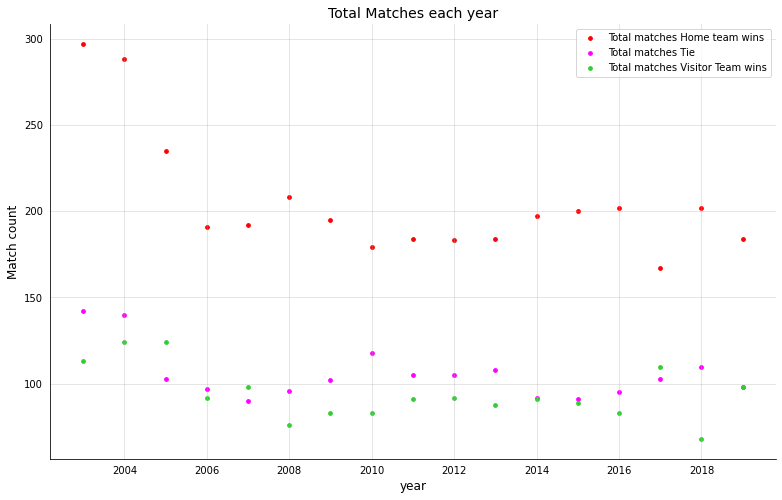

In [26]:
plt.figure(figsize=(13,8))
plt.scatter(year, home, color='red', label="Total matches Home team wins", s=14)
plt.scatter(year, tie, color='magenta', label="Total matches Tie", s=14)
plt.scatter(year, visiting, color='limegreen', label="Total matches Visitor Team wins", s=14)

plt.ylabel("Match count", size=12)
plt.xlabel("year", size=12)

plt.grid(alpha=0.4)
plt.tick_params(left = False, bottom=False)

count = 1;
for spine in plt.gca().spines.values():
    if(count&1):
        pass;
    else:
        spine.set_visible(False)
    count += 1
    
plt.title("Total Matches each year", size=14)
plt.legend()    
plt.show()

# End Sem Design Activity

In [234]:
df = pd.read_csv("brasil.csv")
df

,ID,Data,Ano,Rodada,Equipe_mandante,Equipe_visitante,Gols_mandante,Gols_visitante,Mandante_UF,Visitante_UF,Vencedor,Arena,OBS
0,2003.01.0001,29/03/2003,2003,1,Guarani,Vasco,4,2,SP,RJ,Mandante,Brinco de Ouro,NaN
1,2003.01.0002,29/03/2003,2003,1,Athletico-PR,Grêmio,2,0,PR,RS,Mandante,Arena da Baixada,NaN
2,2003.01.0003,30/03/2003,2003,1,Flamengo,Coritiba,1,1,RJ,PR,Empate,Maracanã,NaN
3,2003.01.0004,30/03/2003,2003,1,Goiás,Paysandu,2,2,GO,PA,Empate,Serra Dourada,NaN
4,2003.01.0005,30/03/2003,2003,1,Internacional,Ponte Preta,1,1,RS,SP,Empate,Beira-Rio,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6881,2019.38.0376,08/12/2019,2019,38,Vasco,Chapecoense,1,1,RJ,SC,Empate,Maracanã,NaN
6882,2019.38.0377,08/12/2019,2019,38,Botafogo-RJ,Ceará,1,1,RJ,CE,Empate,Engenhão,NaN
6883,2019.38.0378,08/12/2019,2019,38,Avaí,Athletico-PR,0,0,SC,PR,Empate,Ressacada,NaN
6884,2019.38.0379,08/12/2019,2019,38,Goiás,Grêmio,3,2,GO,RS,Mandante,Serra Dourada,NaN


### Converting dataset into english

In [235]:
new_columns = {
    'Data': 'Match Date',
    'Ano': 'Season (Year)',
    'Rodada': 'Season round',
    'Equipe_mandante': 'Home team',
    'Equipe_visitante': 'Visitor team',
    'Gols_mandante': 'Home team Goals',
    'Gols_visitante': 'Visitor team Goals',
    'Mandante_UF': 'Home team Brazil\'s state',
    'Visitante_UF': 'Visitor team Brazil\'s state',
    'Vencedor': 'Winner',
    'OBS': 'Comments'
}

df.rename(columns = new_columns, inplace=True)

d = {
    'Mandante': 'home',
    'Empate': 'tie',
    'Visitante': 'visiting'
}

for each in d.keys():
    df.loc[df['Winner'] == each, 'Winner'] = d[each]

    
df


,ID,Match Date,Season (Year),Season round,Home team,Visitor team,Home team Goals,Visitor team Goals,Home team Brazil's state,Visitor team Brazil's state,Winner,Arena,Comments
0,2003.01.0001,29/03/2003,2003,1,Guarani,Vasco,4,2,SP,RJ,home,Brinco de Ouro,NaN
1,2003.01.0002,29/03/2003,2003,1,Athletico-PR,Grêmio,2,0,PR,RS,home,Arena da Baixada,NaN
2,2003.01.0003,30/03/2003,2003,1,Flamengo,Coritiba,1,1,RJ,PR,tie,Maracanã,NaN
3,2003.01.0004,30/03/2003,2003,1,Goiás,Paysandu,2,2,GO,PA,tie,Serra Dourada,NaN
4,2003.01.0005,30/03/2003,2003,1,Internacional,Ponte Preta,1,1,RS,SP,tie,Beira-Rio,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6881,2019.38.0376,08/12/2019,2019,38,Vasco,Chapecoense,1,1,RJ,SC,tie,Maracanã,NaN
6882,2019.38.0377,08/12/2019,2019,38,Botafogo-RJ,Ceará,1,1,RJ,CE,tie,Engenhão,NaN
6883,2019.38.0378,08/12/2019,2019,38,Avaí,Athletico-PR,0,0,SC,PR,tie,Ressacada,NaN
6884,2019.38.0379,08/12/2019,2019,38,Goiás,Grêmio,3,2,GO,RS,home,Serra Dourada,NaN


### Cleaning the table...

In [236]:
df.drop(['Comments'], axis=1, inplace=True)
df['Total Goals'] = df['Home team Goals'] + df['Visitor team Goals']
df


,ID,Match Date,Season (Year),Season round,Home team,Visitor team,Home team Goals,Visitor team Goals,Home team Brazil's state,Visitor team Brazil's state,Winner,Arena,Total Goals
0,2003.01.0001,29/03/2003,2003,1,Guarani,Vasco,4,2,SP,RJ,home,Brinco de Ouro,6
1,2003.01.0002,29/03/2003,2003,1,Athletico-PR,Grêmio,2,0,PR,RS,home,Arena da Baixada,2
2,2003.01.0003,30/03/2003,2003,1,Flamengo,Coritiba,1,1,RJ,PR,tie,Maracanã,2
3,2003.01.0004,30/03/2003,2003,1,Goiás,Paysandu,2,2,GO,PA,tie,Serra Dourada,4
4,2003.01.0005,30/03/2003,2003,1,Internacional,Ponte Preta,1,1,RS,SP,tie,Beira-Rio,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6881,2019.38.0376,08/12/2019,2019,38,Vasco,Chapecoense,1,1,RJ,SC,tie,Maracanã,2
6882,2019.38.0377,08/12/2019,2019,38,Botafogo-RJ,Ceará,1,1,RJ,CE,tie,Engenhão,2
6883,2019.38.0378,08/12/2019,2019,38,Avaí,Athletico-PR,0,0,SC,PR,tie,Ressacada,0
6884,2019.38.0379,08/12/2019,2019,38,Goiás,Grêmio,3,2,GO,RS,home,Serra Dourada,5


In [37]:
from mlxtend.preprocessing import TransactionEncoder
from collections import defaultdict
from itertools import chain, combinations
import time
import re

# 1. Test drive the Apriori Algorithm to generate association rules satisfying minimum support and confidence

### Trying on "Total Goals, Home team Brazil's state, Visitor team Brazil's state, Winner" Columns 

In [229]:
# selecting columns of interest and converting into form suitable for Apriori..
new_df = df[["Total Goals", "Home team Brazil's state", "Visitor team Brazil's state", "Winner"]
new_df = new_df.astype(str)
data = new_df.values.tolist()
TE = TransactionEncoder()
TE_arr = TE.fit(data).transform(data)
TE_arr

array([[False, False, False, ...,  True, False, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False,  True, False],
       ...,
       [ True, False, False, ..., False,  True, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False,  True]])

In [230]:
# get unique column names in new_df
columns = []
temp = []
for each in new_df:
    temp = sorted(new_df[each].unique())
    columns.extend(temp)
    
columns = sorted(set(columns))

new_df_2 = pd.DataFrame(TE_arr, columns=columns)
new_df_2

,0,1,10,11,2,3,4,5,6,7,...,PE,PR,RJ,RN,RS,SC,SP,home,tie,visiting
0,False,False,False,False,False,False,False,False,True,False,...,False,False,True,False,False,False,True,True,False,False
1,False,False,False,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
2,False,False,False,False,True,False,False,False,False,False,...,False,True,True,False,False,False,False,False,True,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6881,False,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,True,False,False,True,False
6882,False,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
6883,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
6884,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,True,False,False


In [240]:
def getItemSetFromList(itemSetList):
    tempItemSet = set()

    for itemSet in itemSetList:
        for item in itemSet:
            tempItemSet.add(frozenset([item]))

    return tempItemSet 


# generating the powerset of subset
def powerset(s):
    return chain.from_iterable(combinations(s, r) for r in range(1, len(s)))


def associationRule(freqItemSet, itemSetWithSup, minConf):
    rules = []
    for k, itemSet in freqItemSet.items():
        for item in itemSet:
            subsets = powerset(item)
            for s in subsets:
                confidence = float(
                    itemSetWithSup[item] / itemSetWithSup[frozenset(s)])
                if(confidence > minConf):
                    rules.append([set(s), set(item.difference(s)), confidence])
    return rules


def getAboveMinSup(itemSet, itemSetList, minSup, globalItemSetWithSup):
    freqItemSet = set()
    localItemSetWithSup = defaultdict(int)

    for item in itemSet:
        for itemSet in itemSetList:
            if item.issubset(itemSet):
                globalItemSetWithSup[item] += 1
                localItemSetWithSup[item] += 1

    for item, supCount in localItemSetWithSup.items():
        support = float(supCount / len(itemSetList))
        if(support >= minSup):
            freqItemSet.add(item)

    return freqItemSet


def getUnion(itemSet, length):
    return set([i.union(j) for i in itemSet for j in itemSet if len(i.union(j)) == length])


def pruning(candidateSet, prevFreqSet, length):
    tempCandidateSet = candidateSet.copy()
    for item in candidateSet:
        subsets = combinations(item, length)
        for subset in subsets:
            # if the subset is not in previous K-frequent get, then remove the set
            if(frozenset(subset) not in prevFreqSet):
                tempCandidateSet.remove(item)
                break
    return tempCandidateSet


'''
    my_apriori
    input:  data as as list of lists,
            min-support,
            confidence
    
    output: frquent items and rules as a pandas dataframe
'''
def my_apriori(itemSetList, minSup, minConf):
    C1ItemSet = getItemSetFromList(itemSetList)
    
    # Final result, global frequent itemset
    globalFreqItemSet = dict()
    
    # Storing global itemset with support count
    globalItemSetWithSup = defaultdict(int)

    L1ItemSet = getAboveMinSup(C1ItemSet, itemSetList, minSup, globalItemSetWithSup)
    currentLSet = L1ItemSet
    k = 2

    # calculating frequent item set
    while(currentLSet):
        
        # storing frequent itemset
        globalFreqItemSet[k-1] = currentLSet
        
        # Self-joining Lk
        candidateSet = getUnion(currentLSet, k)
        
        # Perform subset testing and remove pruned supersets
        candidateSet = pruning(candidateSet, currentLSet, k-1)
        
        # Scanning itemSet for counting support
        currentLSet = getAboveMinSup(candidateSet, itemSetList, minSup, globalItemSetWithSup)
        
        k += 1

    rules = associationRule(globalFreqItemSet, globalItemSetWithSup, minConf)
    rules.sort(key=lambda x: x[2])

    # converting it into dataframe for much readable form..
    frquent_items = []
    for each in globalFreqItemSet:
        for item in globalFreqItemSet[each]:
            frquent_items.append([each, tuple(item)])

    frquent_items_df = pd.DataFrame(frquent_items, columns=['size', 'itemsets'])
    rules_df = pd.DataFrame(rules, columns=['antecedents', 'consequents', 'confidence'])
    
    return frquent_items_df, rules_df


In [253]:
'''
    my_apriori
    input:  data as as list of lists,
            min-support,
            confidence
    
    output: frquent items and rules as a pandas dataframe
'''
frquent_items, my_rules = my_apriori(data, 0.1, 0.3)
frquent_items

,size,itemsets
0,1,"(home,)"
1,1,"(SC,)"
2,1,"(1,)"
3,1,"(MG,)"
4,1,"(2,)"
5,1,"(visiting,)"
6,1,"(tie,)"
7,1,"(4,)"
8,1,"(RJ,)"
9,1,"(SP,)"


Above are the frequent itemsets generated by Apriori Function. Size columns tell number of items in itemset.


These data are generated from columns "Total Goals", "Home team Brazil's state", "Visitor team Brazil's state", "Winner"

In [254]:
my_rules

,antecedents,consequents,confidence
0,{home},{RJ},0.317947
1,{home},{SP},0.439507
2,{visiting},{SP},0.445415
3,{tie},{SP},0.452925
4,{tie},{2},0.459053
5,{2},{SP},0.459590
6,{RJ},{home},0.483857
7,{2},{tie},0.496984
8,{SP},{home},0.500980
9,{MG},{home},0.510014


Above are Association Rules generated from Ariori.

Rules have been generated with confidence. Ex: 

"IF home team is the winner then that team belongs to 'RJ' State with confience of 31.79%"

"IF 3 goal have been scored in the match then winner is HOME team with confidence of 65.82%"

"IF 1 goal have been scored in the match then winner is HOME team with confidence of 65.96%"

# 2. Generate closed frequent itemsets by employing ACLOSE Algorithm. 

In [336]:
def pruneItemsets(itemsets, transactions, min_support):
    item_counts = {}
    for transaction in transactions:
        for itemset in itemsets:
            if itemset.issubset(transaction):
                item_counts[itemset] = item_counts.get(itemset, 0) + 1
                
        num_transactions = float(len(transactions))
        
        pruned_item_counts = {}
        for itemset, count in item_counts.items():
            support = count / num_transactions
            if support >= min_support:
                pruned_item_counts[itemset] = count
                
    return pruned_item_counts


# to check if the itemsets are closed or not.. 
def isClosed(itemset, all_frequent_itemsets, support_lookup):
    for frequent_itemset in all_frequent_itemsets:
        if(itemset != frequent_itemset and set(itemset).issubset(set(frequent_itemset))):
            if(support_lookup[itemset] == support_lookup[frequent_itemset]):
                return False
            
    return True


def prepareDataset(dataframe):
    # converting data into str to make it compatible...
    dataframe = dataframe.astype(str)
    dataList = dataframe.values.tolist()
    num = random.randint(1000,2000)
    for row in dataList:
        for item in row:
            if(re.match('^[0-9]*$|^NULL$|NAN', item)):
                item = " "
    for j in range(5):
        data = random.choice(dataList)
        [dataList.insert(random.randint(0,len(dataList)-1), data) for i in range(num)]
        
    return dataList



'''
    ACLOSE
    input:  data as as list of lists,
            min-support
    
    output: closed items and support lookup as a pandas dataframe
'''

def ACLOSE(transactions, min_support):
    all_frequent_itemsets = []
    closed_itemsets = []
    support_lookup = {}
    
    k = 1
    while True:
        candidate_itemsets = set()
        if(k == 1):
            for transaction in transactions:
                for item in transaction:
                    candidate_itemsets.add(frozenset([item]))
    
        else:
            for itemset1 in frequent_itemsets:
                for itemset2 in frequent_itemsets:
                    union = itemset1.union(itemset2)
                    if(len(union) == k and union not in candidate_itemsets):
                        candidate_itemsets.add(union)
                    
        item_counts = pruneItemsets(candidate_itemsets, transactions, min_support)
        frequent_itemsets = list(item_counts.keys())
        if(len(frequent_itemsets) == 0):
            break
        
        all_frequent_itemsets.extend(frequent_itemsets)
        support_lookup = support_lookup | item_counts
        if(k > 2):
            for itemset in frequent_itemsets:
                if(isClosed(itemset, all_frequent_itemsets, support_lookup)):
                    closed_itemsets.append(itemset)
        k += 1
    
    
    # converting it into dataframe for much readable form..
    closed_items = []
    for each in closed_itemsets:
        closed_items.append([len(tuple(each)), tuple(each)])

    closed_items_df = pd.DataFrame(closed_items, columns=['size', 'Closed itemsets'])
    
    support_lookup_df = []
    for each in support_lookup:
        support_lookup_df.append([tuple(each), support_lookup[each]])
        
    support_lookup_df = pd.DataFrame(support_lookup_df, columns=['items', 'count'])
    
    
    return closed_items_df, support_lookup_df



In [337]:
# selecting columns on which ACLOSE will be performed...
new_df = df[["Total Goals", "Home team Brazil's state", "Visitor team Brazil's state", "Winner"]]
data = prepareDataset(new_df)

'''
    ACLOSE
    input:  data as as list of lists,
            min-support
    
    output: closed items and support lookup as a pandas dataframe
'''

closed_itemsets, support_lookup = ACLOSE(data, 0.2)
closed_itemsets

,size,Closed itemsets
0,3,"(2, RJ, tie)"
1,3,"(2, SP, tie)"
2,3,"(SP, RJ, tie)"
3,3,"(2, SP, RJ)"
4,4,"(RJ, 2, SP, tie)"


Above table is the output of ACLOSE function..These itemsets are Closed Frequent Itemsets.

In [338]:
support_lookup

,items,count
0,"(tie,)",8350
1,"(RJ,)",7536
2,"(SP,)",8304
3,"(home,)",3488
4,"(2,)",5591
5,"(RJ, tie)",5872
6,"(SP, tie)",6057
7,"(SP, RJ)",4577
8,"(2, RJ)",4516
9,"(2, tie)",4757


Above tables shows number of counts each itemsets have been occured in the dataset.

# 3. Test drive the Bayesian Classifier on dataset

In [343]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OrdinalEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [380]:
# Get columns of interest
B_df = df[["Season round", "Home team", "Visitor team", "Total Goals", "Arena", "Winner"]]
B_df

,Season round,Home team,Visitor team,Total Goals,Arena,Winner
0,1,Guarani,Vasco,6,Brinco de Ouro,home
1,1,Athletico-PR,Grêmio,2,Arena da Baixada,home
2,1,Flamengo,Coritiba,2,Maracanã,tie
3,1,Goiás,Paysandu,4,Serra Dourada,tie
4,1,Internacional,Ponte Preta,2,Beira-Rio,tie
...,...,...,...,...,...,...
6881,38,Vasco,Chapecoense,2,Maracanã,tie
6882,38,Botafogo-RJ,Ceará,2,Engenhão,tie
6883,38,Avaí,Athletico-PR,0,Ressacada,tie
6884,38,Goiás,Grêmio,5,Serra Dourada,home


In [381]:
# converting into feature and Label set
train_X = B_df.iloc[:,:-1]
train_Y = B_df.iloc[:,-1]
train_Y

0           home
1           home
2            tie
3            tie
4            tie
          ...   
6881         tie
6882         tie
6883         tie
6884        home
6885    visiting
Name: Winner, Length: 6886, dtype: object

In [382]:
# encoding data for classifier
OE = OrdinalEncoder()
for i in range(train_X.shape[1]):
    col = train_X.iloc[:,i]
    col = col.values.reshape(-1,1)
    train_X.iloc[:,i] = OE.fit_transform(col)

train_X

,Season round,Home team,Visitor team,Total Goals,Arena
0,0.0,24.0,41.0,6.0,25.0
1,0.0,2.0,22.0,2.0,13.0
2,0.0,18.0,14.0,2.0,61.0
3,0.0,21.0,32.0,4.0,92.0
4,0.0,25.0,33.0,2.0,20.0
...,...,...,...,...,...
6881,37.0,41.0,12.0,2.0,61.0
6882,37.0,8.0,11.0,2.0,40.0
6883,37.0,5.0,2.0,0.0,87.0
6884,37.0,21.0,22.0,5.0,92.0


In [386]:
# splitting the data into train test of 80:20 ...
train_x, test_x, train_y, test_y = train_test_split(train_X, train_Y, test_size=0.2)

classifier = GaussianNB()
classifier.fit(train_x, train_y)

# predicting 
Y_predicted = classifier.predict(test_x)
print("Accuracy = ", metrics.accuracy_score(test_y, Y_predicted))

Accuracy =  0.5834542815674891


With selected columns above Naive Bayes Classifier is able to classify data with the above accuracy.